In [182]:
from keras.models import Sequential
from keras.layers import Dense

# import librart
import sklearn
import numpy as np
import pandas as pd
import pickle
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import scipy
from scipy.sparse import csr_matrix
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import feature_select
import feture_process
from scipy.sparse import load_npz
from scipy.sparse import load_npz
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import tensorflow
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [183]:
train_df = pd.read_csv("./project_data_files/book_rating_train.csv")
test_df = pd.read_csv("./project_data_files/book_rating_test.csv")

One hot code Processing

In [184]:
# process Prublisher and Language
train_df["Language"], test_df["Language"] = feture_process.docclass_preprocess(train_df["Language"],test_df["Language"],10)
train_df["Publisher"], test_df["Publisher"] = feture_process.docclass_preprocess(train_df["Publisher"],test_df["Publisher"],200)

In [185]:
# drop_duplicates
train_df = train_df.drop_duplicates()
train_df = train_df[train_df['pagesNumber'] != 0]
train_df = train_df.reset_index(drop=True)

In [186]:
# use oneHotCode for Publisher (sklearn)
publisher_train_hot = feture_process.process_OneHotEncoder(train_df,"Publisher")
publisher_test_hot = feture_process.process_OneHotEncoder(test_df,"Publisher")
train_df = pd.concat([train_df, publisher_train_hot], axis=1)
test_df = pd.concat([test_df, publisher_test_hot], axis=1)

In [187]:
# use oneHotCode for Language (sklearn)
language_train_hot = feture_process.process_OneHotEncoder(train_df,"Language")
language_test_hot = feture_process.process_OneHotEncoder(test_df,"Language")
train_df = pd.concat([train_df, language_train_hot], axis=1)
test_df = pd.concat([test_df, language_test_hot], axis=1)

In [188]:
# use oneHotCode for label (sklearn)
label_train_hot = feture_process.process_OneHotEncoder(train_df,"rating_label")
train_df = pd.concat([train_df, label_train_hot], axis=1)

Countvectorizer processing

In [189]:
# train_name_countvectorizer
train_name_countvectorizer = pickle.load(open("./project_data_files/book_text_features_countvec/train_name_countvectorizer.pkl", "rb"))
train_name_dic = train_name_countvectorizer.vocabulary_

# train_authors_countvectorizer
train_authors_countvectorizer = pickle.load(open("./project_data_files/book_text_features_countvec/train_authors_countvectorizer.pkl", "rb"))
train_authors_dic = train_authors_countvectorizer.vocabulary_

# train_desc_countvectorizer
train_desc_countvectorizer = pickle.load(open("./project_data_files/book_text_features_countvec/train_desc_countvectorizer.pkl", "rb"))
train_desc__dic = train_desc_countvectorizer.vocabulary_

# process vector features
train_name_features = train_name_countvectorizer.transform(train_df['Name'])
train_authors_features = train_authors_countvectorizer.transform(train_df['Authors'])
train_desc_features = train_desc_countvectorizer.transform(train_df['Description'])
other_features_df = train_df.drop(columns=['Name', 'Authors', 'Description', 'Publisher', 'Language','rating_label_3.0', 'rating_label_4.0', 'rating_label_5.0', 'rating_label'])

In [190]:
# new sparse features
sparse_features = hstack([train_name_features, train_authors_features, train_desc_features])
# new train features
dense_features = csr_matrix(other_features_df.values)
train_features = hstack([sparse_features, dense_features])


# process test features
test_name_features = scipy.sparse.load_npz('./project_data_files/book_text_features_countvec/test_name_vec.npz')
test_authors_features = scipy.sparse.load_npz('./project_data_files/book_text_features_countvec/test_authors_vec.npz')
test_desc_features = scipy.sparse.load_npz('./project_data_files/book_text_features_countvec/test_desc_vec.npz')
test_other_features_df = test_df.drop(columns=['Name', 'Authors', 'Description', 'Publisher', 'Language'])

test_sparse_features = hstack([test_name_features, test_authors_features, test_desc_features])
new_dense_features = csr_matrix(test_other_features_df.values)
test_features = hstack([test_sparse_features, new_dense_features])

doc2vec processing

In [ ]:
# use doc2vec
# use doc2vec
# use doc2vec
# use doc2vec

# process vector features
train_name_features = pd.read_csv(r"./project_data_files/book_text_features_doc2vec/train_name_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
train_authors_features = pd.read_csv(r"./project_data_files/book_text_features_doc2vec/train_authors_doc2vec20.csv", index_col = False, delimiter = ',', header=None)
train_desc_features = pd.read_csv(r"./project_data_files/book_text_features_doc2vec/train_desc_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
other_features_df = train_df.drop(columns=['Name', 'Authors', 'Description', 'Publisher', 'Language', 'rating_label', 'rating_label_3.0', 'rating_label_4.0', 'rating_label_5.0'])
train_features = pd.concat([train_name_features, train_authors_features, train_desc_features, other_features_df], axis=1)

In [ ]:
# use doc2vec
# use doc2vec
# use doc2vec
# use doc2vec

# process test features
test_name_features = pd.read_csv(r"./project_data_files/book_text_features_doc2vec/test_name_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
test_authors_features = pd.read_csv(r"./project_data_files/book_text_features_doc2vec/test_authors_doc2vec20.csv", index_col = False, delimiter = ',', header=None)
test_desc_features = pd.read_csv(r"./project_data_files/book_text_features_doc2vec/test_desc_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
test_other_features_df = test_df.drop(columns=['Name', 'Authors', 'Description', 'Publisher', 'Language'])
test_features = pd.concat([test_name_features, test_authors_features, test_desc_features, test_other_features_df], axis=1)


Feature selection

In [ ]:
selected_features,selected_features_test = train_features,test_features

In [ ]:
selected_features,selected_features_test = feature_select.MI(train_df,train_features,test_features,12000)

In [202]:
selected_features,selected_features_test = feature_select.chi_square(train_df,train_features,test_features,12000)

In [70]:
selected_features,selected_features_test = feature_select.variance_ratio(train_df,train_features,test_features,0.8)

In [73]:
selected_features = load_npz("selected_features_label_one_hot_12000.npz")
selected_features_test = load_npz("selected_features_test_label_one_hot_12000.npz")

hyper parameter choose

In [ ]:
def create_mlp(input_dim, hidden_layers=1, hidden_units=64, activation='relu'):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=input_dim, activation=activation,kernel_regularizer=l2(0.0001)))

    for _ in range(hidden_layers - 1):
        model.add(Dense(hidden_units, activation=activation))

    model.add(Dense(3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
input_dim = selected_features.shape[1] 
mlp = KerasClassifier(build_fn=create_mlp, input_dim=input_dim, verbose=0)

param_grid = {
    'hidden_layers': [1, 2, 3],
    'hidden_units': [32, 64, 128],
    'activation': ['relu', 'tanh'],
    'batch_size': [32, 64],
    'epochs': [50, 100],
}
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('gridsearch', GridSearchCV(mlp, param_grid, cv=3, n_jobs=-1, verbose=1)),
])
X_train, X_val, y_train, y_val = train_test_split(selected_features, train_df["rating_label"], test_size=0.3, random_state=66)
X_train = X_train.toarray()
X_val = X_val.toarray()

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
best_params = pipeline.named_steps['gridsearch'].best_params_

train model

In [203]:
from keras.regularizers import l1, l2
import tensorflow as tf
from tensorflow.keras import metrics
X_train, X_val, y_train, y_val = train_test_split(selected_features, label_train_hot, test_size=0.3, random_state=66)

input_dim = selected_features.shape[1] 
num_classes = label_train_hot.shape[1]

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(input_dim,)
                , kernel_regularizer=l2(0.0001)
                ))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.0001)))

model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [204]:
X_train = X_train.toarray()
X_val = X_val.toarray()

In [205]:
class_weights = {
    (1, 0, 0): 2.0,
    (0, 1, 0): 1.0,
    (0, 0, 1): 3.0
}

In [206]:
y_train_array = np.array(y_train)
sample_weights = np.array([class_weights[tuple(y)] for y in y_train_array])

In [207]:
from sklearn.utils import class_weight
unique_classes = np.unique(y_train)
sample_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)

In [208]:
mlp = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val)
                 , sample_weight=sample_weights
                )

Epoch 1/50
501/501 [==============================] - 3s 6ms/step - loss: 1.1351 - accuracy: 0.2023 - val_loss: 1.2648 - val_accuracy: 0.2653
Epoch 2/50
501/501 [==============================] - 3s 5ms/step - loss: 0.8325 - accuracy: 0.2725 - val_loss: 1.2539 - val_accuracy: 0.3291
Epoch 3/50
501/501 [==============================] - 3s 6ms/step - loss: 0.7293 - accuracy: 0.3419 - val_loss: 1.2611 - val_accuracy: 0.3468
Epoch 4/50
501/501 [==============================] - 3s 6ms/step - loss: 0.6754 - accuracy: 0.3796 - val_loss: 1.3755 - val_accuracy: 0.3661
Epoch 5/50
501/501 [==============================] - 3s 6ms/step - loss: 0.6009 - accuracy: 0.4539 - val_loss: 1.1203 - val_accuracy: 0.3957
Epoch 6/50
501/501 [==============================] - 3s 6ms/step - loss: 0.4660 - accuracy: 0.5391 - val_loss: 1.5309 - val_accuracy: 0.3589
Epoch 7/50
501/501 [==============================] - 3s 6ms/step - loss: 0.4626 - accuracy: 0.5790 - val_loss: 1.2447 - val_accuracy: 0.4323
Epoch 

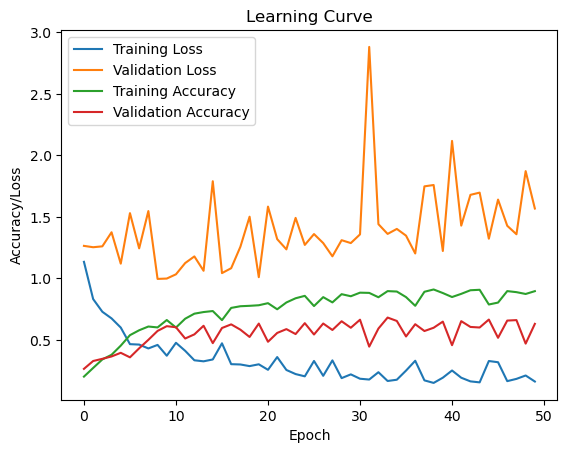

In [209]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(mlp.history['loss'], label='Training Loss')
plt.plot(mlp.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve')

plt.plot(mlp.history['accuracy'], label='Training Accuracy')
plt.plot(mlp.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend(loc='upper left')


plt.show()

In [ ]:
type(selected_features)

In [71]:
# for variance_ratio slection
import tensorflow as tf
coo_matrix = selected_features_test.tocoo()
indices = np.column_stack((coo_matrix.row, coo_matrix.col))
values = coo_matrix.data
shape = coo_matrix.shape

sparse_tensor = tf.SparseTensor(indices=indices, values=values, dense_shape=shape)
ordered_sparse_tensor = tf.sparse.reorder(sparse_tensor)

In [210]:
# validation
prediction_prob = model.predict(X_val)

215/215 [==============================] - 0s 1ms/step


In [211]:
# get predictions
prediction_index = np.argmax(prediction_prob, axis=1)
ratings = np.array([3.0, 4.0, 5.0])
prediction = ratings[prediction_index]



In [212]:
np_y_val = y_val.values
validation_index = np.argmax(np_y_val, axis=1)
ratings = np.array([3.0, 4.0, 5.0])
validation = ratings[validation_index]

Evaluation

In [213]:
print("Accuracy: %.2f%%" % (accuracy_score(validation, prediction) * 100.0))
print("Recall: %.2f%%" % (recall_score(validation, prediction, average='weighted') * 100.0))
print("Precision: %.2f%%" % (precision_score(validation, prediction, average='weighted') * 100.0))
print("F1 score: %.2f%%" % (f1_score(validation, prediction, average='weighted') * 100.0))

Accuracy: 63.10%
Recall: 63.10%
Precision: 67.08%
F1 score: 64.32%


In [23]:
output_df = pd.DataFrame({'rating_label': prediction})
output_df.index += 1
output_df.index.name = 'id'
output_df.to_csv('./predictions.csv')

MLP Bagging

In [13]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score




Accuracy: 0.76


In [14]:
X_train, X_test, y_train, y_test = train_test_split(selected_features, train_df["rating_label"], test_size=0.3, random_state=42)


mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, 
                    batch_size='auto', learning_rate='constant', learning_rate_init=0.001, 
                    max_iter=200, shuffle=True, random_state=None)


bagging = BaggingClassifier(base_estimator=mlp, n_estimators=10, max_samples=0.8, max_features=1.0, 
                            bootstrap=True, bootstrap_features=False, n_jobs=-1, random_state=42)


bagging.fit(X_train, y_train)

y_pred = bagging.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76


In [18]:
y_pred = bagging.predict(selected_features_test)
output_df = pd.DataFrame({'rating_label': y_pred})
output_df.index += 1
output_df.index.name = 'id'
output_df.to_csv('./predictions.csv')

sklearn MLP

In [17]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, 
                    batch_size='auto', learning_rate='constant', learning_rate_init=0.001, 
                     shuffle=True, random_state=None)

NameError: name 'MLPClassifier' is not defined